In [1]:
import pandas as pd

In [2]:
df_cust = pd.read_csv("resources/resources/customer_data.csv")
df_cust.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [4]:
df_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [5]:
df_cust["fea_2"].mean(),df_cust["fea_2"].median()

(1283.9113729508197, 1281.5)

In [6]:
df_cust["fea_2"].fillna(df_cust["fea_2"].mean(),inplace=True)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_graph = pd.DataFrame({
    "Risk Düzeyleri":df_cust["label"].value_counts().index,
    "Risk Miktarları":df_cust["label"].value_counts().values
})
df_graph

,Risk Düzeyleri,Risk Miktarları
0,0,900
1,1,225


<AxesSubplot: title={'center': 'Risk Dağılımı'}, xlabel='Risk Düzeyleri', ylabel='Risk Miktarları'>

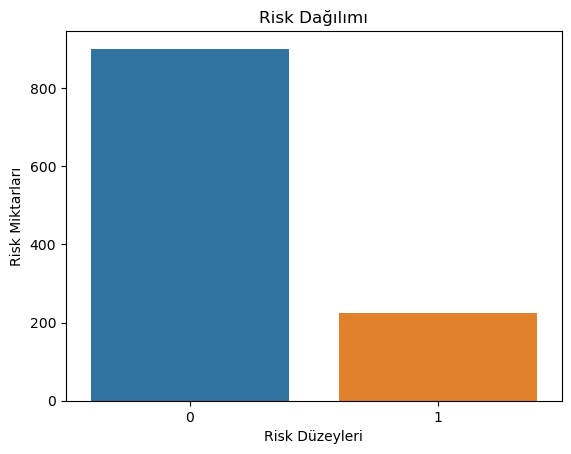

In [9]:
plt.title("Risk Dağılımı")
sns.barplot(data=df_graph,x="Risk Düzeyleri",y="Risk Miktarları")

<AxesSubplot: xlabel='count', ylabel='label'>

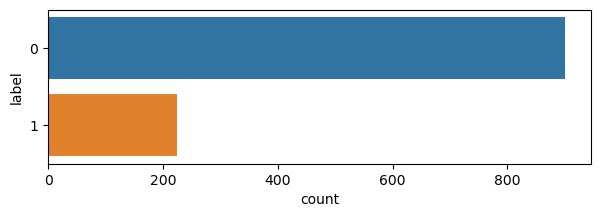

In [24]:
plt.figure(figsize=(7,2))
sns.countplot(data=df_cust,y="label")

In [11]:
y = df_cust["label"]
X = df_cust.drop(["label","id"],axis=1)
df_cust = X.join(y)

In [12]:
df_cust

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,label
0,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974,1
1,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840,0
2,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000,0
3,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000,1
4,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000,0
1121,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000,0
1122,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000,0
1123,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000,0


In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [14]:
sampler = RandomOverSampler()
X_new,y_new = sampler.fit_resample(X,y)#imbalanced data sorunu ortadan kaldırıldı
print(f"Eski Durum:{Counter(y)}")
print(f"Yeni Durum:{Counter(y_new)}")

Eski Durum:Counter({0: 900, 1: 225})
Yeni Durum:Counter({1: 900, 0: 900})


<AxesSubplot: >

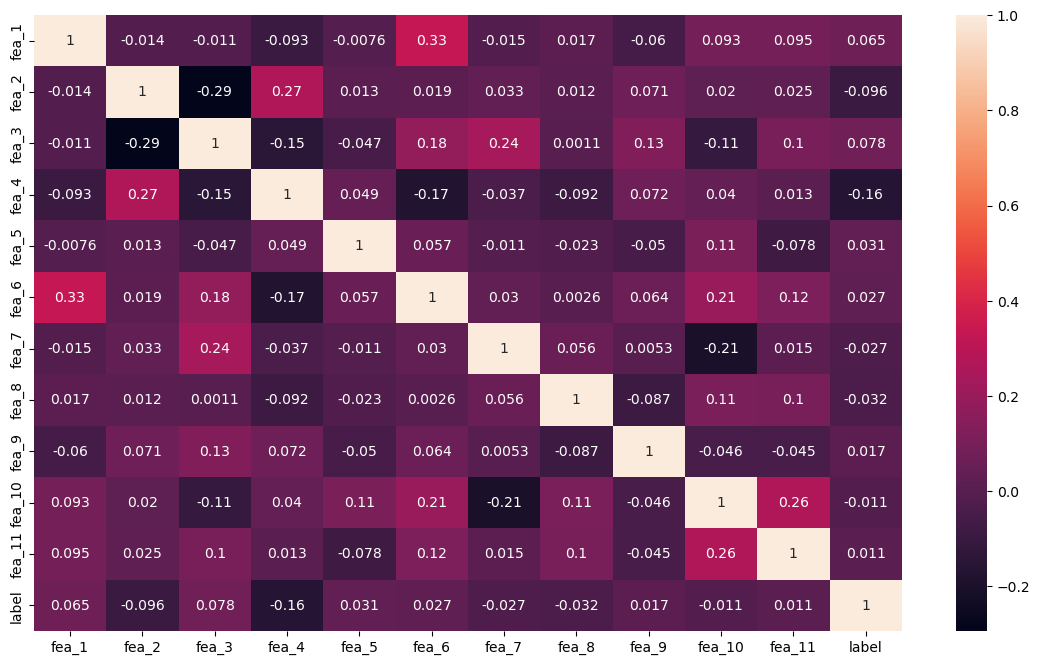

In [15]:
df_cust_new = X_new.join(y_new)
plt.figure(figsize=(14,8))
sns.heatmap(df_cust_new.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
print(f"Train accuracy score = {accuracy_score(y_train,model_tree.predict(X_train))}")
print(f"Test accuracy score = {accuracy_score(y_test,model_tree.predict(X_test))}")

Train accuracy score = 1.0
Test accuracy score = 0.8694444444444445


[Text(0.4559983473557692, 0.975, 'X[3] <= 95500.0\ngini = 0.5\nsamples = 1440\nvalue = [724, 716]'),
 Text(0.14143966553381962, 0.925, 'X[2] <= 1.5\ngini = 0.473\nsamples = 742\nvalue = [285, 457]'),
 Text(0.026525198938992044, 0.875, 'X[0] <= 6.5\ngini = 0.477\nsamples = 84\nvalue = [51, 33]'),
 Text(0.015915119363395226, 0.825, 'X[3] <= 37000.0\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.010610079575596816, 0.775, 'X[7] <= 91.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.005305039787798408, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.015915119363395226, 0.725, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.021220159151193633, 0.775, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.03713527851458886, 0.825, 'X[9] <= 60050.5\ngini = 0.494\nsamples = 56\nvalue = [25, 31]'),
 Text(0.03183023872679045, 0.775, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.042440318302387266, 0.775, 'X[9] <= 65542.5\ngini = 0.465\nsamples = 49\nvalue = [1

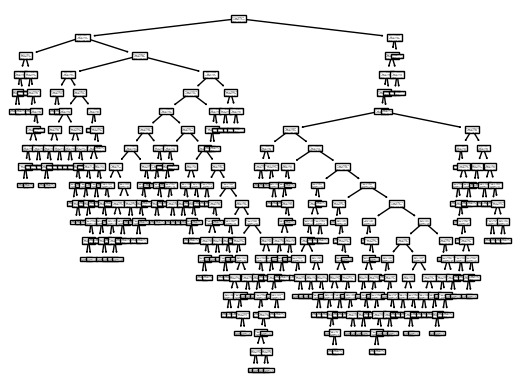

In [20]:
from sklearn import tree
tree.plot_tree(model_tree)

In [21]:
path = model_tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path["ccp_alphas"]

In [22]:
accuracy_train,accuracy_test = [],[]
for i in alphas:
    model_prune = DecisionTreeClassifier(ccp_alpha=i)
    model_prune.fit(X_train,y_train)
    y_train_pred = model_prune.predict(X_train)
    y_test_pred = model_prune.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

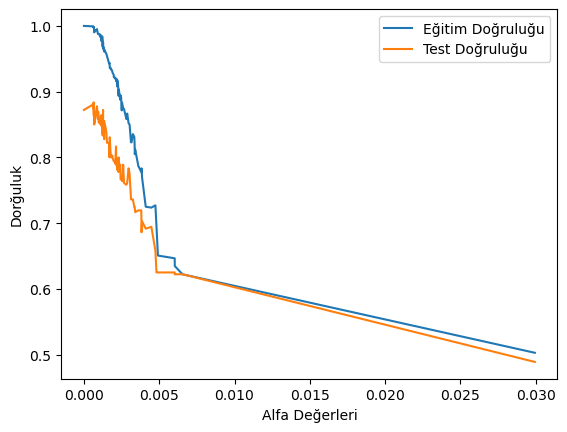

In [26]:
sns.lineplot(y=accuracy_train,x=alphas,label="Eğitim Doğruluğu")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Doğruluğu")
plt.xlabel("Alfa Değerleri")
plt.ylabel("Dorğuluk")
plt.xticks()
plt.show()

In [42]:
model_tree_new = DecisionTreeClassifier(ccp_alpha=0.006)
model_tree_new.fit(X_train,y_train)
print(f"Train accuracy score= {accuracy_score(y_train,model_tree_new.predict(X_train))}")
print(f"Test accuracy score= {accuracy_score(y_test,model_tree_new.predict(X_test))}")

Train accuracy score= 0.6506944444444445
Test accuracy score= 0.625


[Text(0.5555555555555556, 0.9, 'X[3] <= 95500.0\ngini = 0.5\nsamples = 1440\nvalue = [724, 716]'),
 Text(0.4444444444444444, 0.7, 'X[2] <= 1.5\ngini = 0.473\nsamples = 742\nvalue = [285, 457]'),
 Text(0.2222222222222222, 0.5, 'X[0] <= 6.5\ngini = 0.477\nsamples = 84\nvalue = [51, 33]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.494\nsamples = 56\nvalue = [25, 31]'),
 Text(0.6666666666666666, 0.5, 'X[3] <= 50500.0\ngini = 0.458\nsamples = 658\nvalue = [234, 424]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.359\nsamples = 179\nvalue = [42, 137]'),
 Text(0.7777777777777778, 0.3, 'X[7] <= 113.5\ngini = 0.48\nsamples = 479\nvalue = [192, 287]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.47\nsamples = 454\nvalue = [171, 283]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.467\nsamples = 698\nvalue = [439, 259]')]

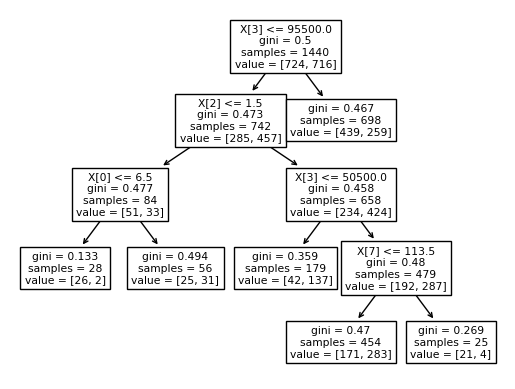

In [43]:
tree.plot_tree(model_tree_new)

<AxesSubplot: >

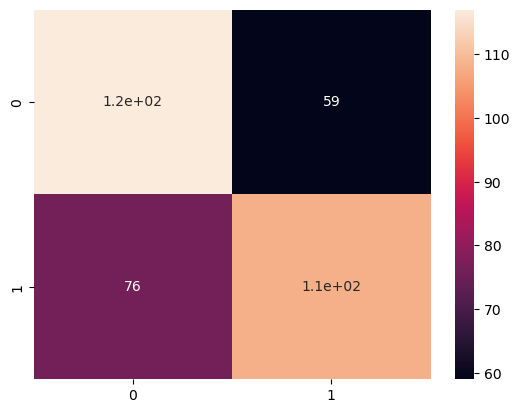

In [44]:
sns.heatmap(confusion_matrix(y_test,model_tree_new.predict(X_test)),annot=True)

In [47]:
((1.2e+02)+(1.1e+02))/len(y_test),print(f"Test accuracy score= {accuracy_score(y_test,model_tree_new.predict(X_test))}")

Test accuracy score= 0.625


(0.6388888888888888, None)